In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import texthero as hero

## Content Based dataset creation

In [30]:
cos = pd.read_csv('cosmetics.csv')

In [31]:
cos.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,product_id
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,1454
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,1455
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,1456
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,1457
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,1458


In [33]:
cos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
 11  product_id   1472 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 138.1+ KB


In [34]:
skin_prod = pd.read_csv('Skincare Products.csv',encoding = 'latin_1')

In [36]:
skin_prod_change = skin_prod.drop(columns = ['good_reviews','bad_reviews']) #columns dropped as they were empty

In [37]:
skin_prod_change.head()

,product_name,product_url,category,ingredients,price,brand,rating,product_id,image_url,description
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"['capric triglyceride', 'cetyl alcohol', 'prop...",5.2,The Ordinary,4.55,315,https://static.thcdn.com/images/large/original...,Effectively hydrate skin with The Ordinary Nat...
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"['homosalate', 'glycerin', 'octocrylene', 'eth...",13.0,CeraVe,4.27,316,https://static.thcdn.com/images/large/original...,Protect your skin with
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"['sodium hyaluronate', 'sodium hyaluronate', '...",6.2,The Ordinary,4.70,317,https://static.thcdn.com/images/large/original...,Recharge and rehydrate your complexion with the
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"['ammonium lactate', 'c12-15', 'glycerin', 'pr...",22.5,NaN,NaN,318,NaN,NaN
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"['glycerin', 'cetearyl alcohol', 'capric trigl...",16.0,CeraVe,4.71,319,https://static.thcdn.com/images/large/original...,Envelope your skin in the replenishing powers ...


In [38]:
skin_prod_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  2924 non-null   object 
 1   product_url   1453 non-null   object 
 2   category      2924 non-null   object 
 3   ingredients   2924 non-null   object 
 4   price         2924 non-null   float64
 5   brand         2640 non-null   object 
 6   rating        854 non-null    float64
 7   product_id    2924 non-null   int64  
 8   image_url     854 non-null    object 
 9   description   854 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.6+ KB


##### Comparing the length of unique values across both dataset

In [32]:
len(cos.product_id.unique())

1472

In [39]:
len(skin_prod_change.product_id.unique())

2924

For content based dataset, we want to retain as many data feature, as such since there is less unique data in cosmetic dataframe, will combine data using skin_product as the base.

##### Combining dataframes on product_id

In [41]:
cosmetics_data = skin_prod_change.join(cos.set_index('product_id'), on='product_id') #skin product csv as base
cosmetics_data.head()

,product_name,product_url,category,ingredients,price,brand,rating,product_id,image_url,description,...,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"['capric triglyceride', 'cetyl alcohol', 'prop...",5.2,The Ordinary,4.55,315,https://static.thcdn.com/images/large/original...,Effectively hydrate skin with The Ordinary Nat...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"['homosalate', 'glycerin', 'octocrylene', 'eth...",13.0,CeraVe,4.27,316,https://static.thcdn.com/images/large/original...,Protect your skin with,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"['sodium hyaluronate', 'sodium hyaluronate', '...",6.2,The Ordinary,4.70,317,https://static.thcdn.com/images/large/original...,Recharge and rehydrate your complexion with the,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"['ammonium lactate', 'c12-15', 'glycerin', 'pr...",22.5,NaN,NaN,318,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"['glycerin', 'cetearyl alcohol', 'capric trigl...",16.0,CeraVe,4.71,319,https://static.thcdn.com/images/large/original...,Envelope your skin in the replenishing powers ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
cosmetics_data.columns

Index(['product_name', 'product_url', 'category', 'ingredients', 'price',
       'brand', 'rating', 'product_id', 'image_url', 'description', 'Label',
       'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination', 'Dry',
       'Normal', 'Oily', 'Sensitive'],
      dtype='object')

##### Removal of repeated columns or irreleant columns

In [46]:
content_based_df = skin_prod_change.join(cos.set_index('product_id'), on='product_id') #skin product csv as base
content_based_df.head()

,product_name,product_url,category,ingredients,price,brand,rating,product_id,image_url,description,...,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"['capric triglyceride', 'cetyl alcohol', 'prop...",5.2,The Ordinary,4.55,315,https://static.thcdn.com/images/large/original...,Effectively hydrate skin with The Ordinary Nat...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"['homosalate', 'glycerin', 'octocrylene', 'eth...",13.0,CeraVe,4.27,316,https://static.thcdn.com/images/large/original...,Protect your skin with,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"['sodium hyaluronate', 'sodium hyaluronate', '...",6.2,The Ordinary,4.70,317,https://static.thcdn.com/images/large/original...,Recharge and rehydrate your complexion with the,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"['ammonium lactate', 'c12-15', 'glycerin', 'pr...",22.5,NaN,NaN,318,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"['glycerin', 'cetearyl alcohol', 'capric trigl...",16.0,CeraVe,4.71,319,https://static.thcdn.com/images/large/original...,Envelope your skin in the replenishing powers ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
content_based_df.columns

Index(['product_name', 'product_url', 'category', 'ingredients', 'price',
       'brand', 'rating', 'product_id', 'image_url', 'description', 'Label',
       'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination', 'Dry',
       'Normal', 'Oily', 'Sensitive'],
      dtype='object')

In [48]:
content_based_df = content_based_df.drop(columns = ['product_url','image_url','Label','Brand','Name',
                                                   'Price','Ingredients','Rank'])

In [49]:
content_based_df.head()

,product_name,category,ingredients,price,brand,rating,product_id,description,Combination,Dry,Normal,Oily,Sensitive
0,The Ordinary Natural Moisturising Factors + HA...,Moisturiser,"['capric triglyceride', 'cetyl alcohol', 'prop...",5.2,The Ordinary,4.55,315,Effectively hydrate skin with The Ordinary Nat...,NaN,NaN,NaN,NaN,NaN
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,Moisturiser,"['homosalate', 'glycerin', 'octocrylene', 'eth...",13.0,CeraVe,4.27,316,Protect your skin with,NaN,NaN,NaN,NaN,NaN
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,Moisturiser,"['sodium hyaluronate', 'sodium hyaluronate', '...",6.2,The Ordinary,4.70,317,Recharge and rehydrate your complexion with the,NaN,NaN,NaN,NaN,NaN
3,AMELIORATE Transforming Body Lotion 200ml,Moisturiser,"['ammonium lactate', 'c12-15', 'glycerin', 'pr...",22.5,NaN,NaN,318,NaN,NaN,NaN,NaN,NaN,NaN
4,CeraVe Moisturising Cream 454g,Moisturiser,"['glycerin', 'cetearyl alcohol', 'capric trigl...",16.0,CeraVe,4.71,319,Envelope your skin in the replenishing powers ...,NaN,NaN,NaN,NaN,NaN


In [50]:
len(content_based_df.product_id.unique())

2924

## EDA and Data-preprocessing for Collaborative Dataset

In [56]:
content_based_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  2924 non-null   object 
 1   category      2924 non-null   object 
 2   ingredients   2924 non-null   object 
 3   price         2924 non-null   float64
 4   brand         2640 non-null   object 
 5   rating        854 non-null    float64
 6   product_id    2924 non-null   int64  
 7   description   854 non-null    object 
 8   Combination   1471 non-null   float64
 9   Dry           1471 non-null   float64
 10  Normal        1471 non-null   float64
 11  Oily          1471 non-null   float64
 12  Sensitive     1471 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 297.1+ KB


In [57]:
content_based_df.isna().sum() #number of NA items

product_name       0
category           0
ingredients        0
price              0
brand            284
rating          2070
product_id         0
description     2070
Combination     1453
Dry             1453
Normal          1453
Oily            1453
Sensitive       1453
dtype: int64

<AxesSubplot: >

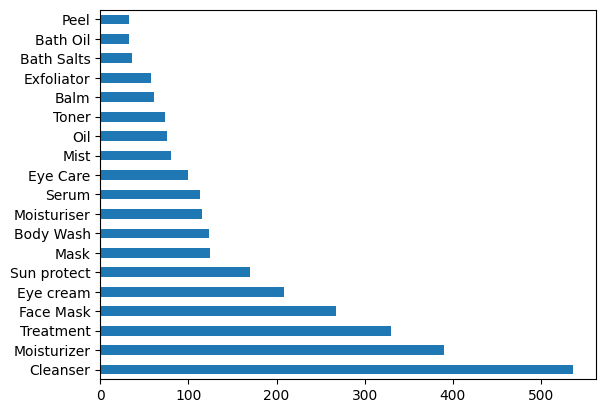

In [58]:
content_based_df['category'].value_counts().plot(kind='barh')

#### Filling of Missing Brand value

In [59]:
missing_brand_index = np.where(pd.isna(content_based_df.brand))

In [60]:
missing_index_list = list(missing_brand_index)

In [61]:
missing_index_list

[array([   3,    9,   15,   17,   26,   27,   31,   35,   43,   44,   45,
          50,   51,   52,   64,   65,   70,   74,   76,   80,   84,   94,
          96,   97,  110,  111,  113,  119,  120,  123,  144,  147,  152,
         154,  157,  162,  168,  169,  170,  171,  175,  179,  180,  181,
         183,  184,  185,  190,  191,  193,  194,  201,  202,  207,  208,
         213,  215,  218,  223,  225,  228,  229,  230,  236,  237,  240,
         250,  252,  263,  273,  282,  285,  287,  290,  299,  301,  303,
         306,  310,  311,  313,  317,  318,  319,  332,  336,  339,  348,
         349,  354,  358,  359,  366,  367,  368,  369,  373,  374,  375,
         376,  377,  378,  380,  387,  388,  391,  394,  395,  396,  403,
         418,  421,  425,  433,  437,  438,  441,  444,  457,  459,  463,
         480,  489,  491,  497,  507,  510,  513,  518,  522,  541,  543,
         552,  553,  560,  566,  583,  585,  590,  593,  594,  595,  596,
         598,  599,  600,  603,  609, 

In [62]:
# create a list of unique brand names
brand_list = content_based_df[content_based_df['brand'].notna()].brand.unique().tolist()

In [63]:
brand_list

['The Ordinary',
 'CeraVe',
 'First Aid Beauty',
 'Avene',
 'Clinique',
 'Weleda',
 'Egyptian Magic',
 'JASON',
 'Embryolisse',
 'La Roche-Posay',
 'Bulldog Skincare for Men',
 'EstÃ©e Lauder',
 'The Chemistry Brand',
 'Elemis',
 'The INKEY List',
 'Origins',
 'Elizabeth Arden',
 'PRAI',
 'Clinique for Men',
 'Caudalie',
 'NeutrogenaÂ®',
 'LOrÃ©al Paris Men Expert',
 "L'OrÃ©al Paris",
 'Dr.Jart+',
 'Antipodes',
 'NIOD',
 'Murad',
 'COSRX',
 'bareMinerals',
 'Eucerin',
 'Sukin',
 'Fade Out',
 'Alpha-H',
 'Pai',
 'Liz Earle',
 'AMELIORATE',
 'Medik8',
 'Vichy',
 'PIXI',
 'NIP+FAB',
 'By Terry',
 'Tan-Luxe',
 'LancÃ´me',
 'Sanctuary Spa',
 'Peter Thomas Roth',
 'OSKIA',
 'DECLEOR',
 'Holika Holika',
 'Dermalogica',
 'SkinCeuticals',
 'GallinÃ©e',
 'Darphin',
 'Zelens',
 'GLAMGLOW',
 'Bobbi Brown',
 'Indeed Labs',
 'Natio',
 "Neal's Yard Remedies",
 'Chantecaille',
 'Omorovicza',
 'Aveda',
 'Sarah Chapman Skinesis',
 'The Organic Pharmacy',
 'Erno Laszlo',
 'Skinny Tan',
 'NUXE',
 'Bondi S

In [64]:
brand_list[95] = "Burt's Bee"
#one of the brand name is reading zero, which should actually be Burt bee filling this up else subsequent code 
#on filling brandname will not work

In [65]:
for i in range(np.shape(missing_index_list)[1]):
    j = missing_brand_index[0][i]
    for k in range(len(brand_list)):
        if brand_list[k] in content_based_df['product_name'][j]:
            content_based_df.at[j,'brand'] = brand_list[k]

In [66]:
content_based_df.iloc[9]

product_name     Clinique Moisture Surge 72 Hour Moisturiser 75ml
category                                              Moisturiser
ingredients     ['dimethicon', 'butylene glycol', 'glycerin', ...
price                                                        37.0
brand                                                    Clinique
rating                                                        NaN
product_id                                                    324
description                                                   NaN
Combination                                                   NaN
Dry                                                           NaN
Normal                                                        NaN
Oily                                                          NaN
Sensitive                                                     NaN
Name: 9, dtype: object

In [68]:
content_based_df.isna().sum() #number of NA items post processing

product_name       0
category           0
ingredients        0
price              0
brand             72
rating          2070
product_id         0
description     2070
Combination     1453
Dry             1453
Normal          1453
Oily            1453
Sensitive       1453
dtype: int64

In [67]:
content_based_df.to_csv('content_main.csv', index=False)

## Collaborative Based dataset creation

In [2]:
user = pd.read_csv('User Reviews.csv',encoding = 'latin_1')

In [3]:
user.head()

,User_id,Product_id,Username,Stars,Review,Review_cleaned,Combination,Dry,Normal,Oily,Sensitive,Skin_Tone,Skin_Type,Eye_Color,Hair_Color
0,3420,157.0,allyp3,5,This is hands down the best cleanser I've ever...,"['hand', 'best', 'cleanser', 'ever', 'used', '...",0,0,0,0,0,Medium,Combination,Brown,Brunette
1,2483,157.0,PatTea,1,Unfortunately this doesn't work for everyone. ...,"['unfortunately', 'work', 'everyone', 'used', ...",0,0,0,0,0,Medium,Combination,Brown,Red
2,2715,157.0,Sabi1991,5,My favorite cleanser!! i love the packaging on...,"['favorite', 'cleanser', 'love', 'packaging', ...",0,0,0,0,0,No data,No data,No data,No data
3,4497,157.0,happyface2,5,I love all things Youth To The People! This cl...,"['love', 'thing', 'youth', 'people', 'cleanser...",0,0,0,0,0,Fair,Dry,Blue,Blonde
4,5017,157.0,kimkix34,5,I had a trial size of this and was obsessed. M...,"['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",0,0,0,0,0,Fair,Normal,Green,Blonde


In [4]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14141 entries, 0 to 14140
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_id         14141 non-null  int64  
 1   Product_id      13131 non-null  float64
 2   Username        14141 non-null  object 
 3   Stars           14141 non-null  int64  
 4   Review          14141 non-null  object 
 5   Review_cleaned  8649 non-null   object 
 6   Combination     14141 non-null  int64  
 7   Dry             14141 non-null  int64  
 8   Normal          14141 non-null  int64  
 9   Oily            14141 non-null  int64  
 10  Sensitive       14141 non-null  int64  
 11  Skin_Tone       14141 non-null  object 
 12  Skin_Type       14141 non-null  object 
 13  Eye_Color       14141 non-null  object 
 14  Hair_Color      14141 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


In [5]:
skin_care = pd.read_csv('Skincare Products.csv',encoding = 'latin_1')
skin_care.head()

,product_name,product_url,category,ingredients,price,brand,rating,good_reviews,bad_reviews,product_id,image_url,description
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"['capric triglyceride', 'cetyl alcohol', 'prop...",5.2,The Ordinary,4.55,NaN,NaN,315,https://static.thcdn.com/images/large/original...,Effectively hydrate skin with The Ordinary Nat...
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"['homosalate', 'glycerin', 'octocrylene', 'eth...",13.0,CeraVe,4.27,NaN,NaN,316,https://static.thcdn.com/images/large/original...,Protect your skin with
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"['sodium hyaluronate', 'sodium hyaluronate', '...",6.2,The Ordinary,4.70,NaN,NaN,317,https://static.thcdn.com/images/large/original...,Recharge and rehydrate your complexion with the
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"['ammonium lactate', 'c12-15', 'glycerin', 'pr...",22.5,NaN,NaN,NaN,NaN,318,NaN,NaN
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"['glycerin', 'cetearyl alcohol', 'capric trigl...",16.0,CeraVe,4.71,NaN,NaN,319,https://static.thcdn.com/images/large/original...,Envelope your skin in the replenishing powers ...


In [6]:
skin_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  2924 non-null   object 
 1   product_url   1453 non-null   object 
 2   category      2924 non-null   object 
 3   ingredients   2924 non-null   object 
 4   price         2924 non-null   float64
 5   brand         2640 non-null   object 
 6   rating        854 non-null    float64
 7   good_reviews  0 non-null      float64
 8   bad_reviews   0 non-null      float64
 9   product_id    2924 non-null   int64  
 10  image_url     854 non-null    object 
 11  description   854 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 274.2+ KB


##### Comparing the length of unique values across both dataset

In [7]:
len(skin_care['product_id'].unique())

2924

In [9]:
len(user['Product_id'].unique())

1076

As there is less unique data in user dataframe, will combine data using user data as the base.

##### Combining dataframes on product_id

In [10]:
skin_care.columns

Index(['product_name', 'product_url', 'category', 'ingredients', 'price',
       'brand', 'rating', 'good_reviews', 'bad_reviews', 'product_id',
       'image_url', 'description'],
      dtype='object')

In [11]:
skin_care = skin_care[['category','price','product_id']]
skin_care = skin_care.rename(columns = {'product_id':'Product_id'})
#changing name of product_id to be the same for both dataframe to allow merge on product_id

In [12]:
user_user_df = pd.merge(user,skin_care[['Product_id','category','price']],on='Product_id', how='left') #merge based on user info
user_user_df.head()

,User_id,Product_id,Username,Stars,Review,Review_cleaned,Combination,Dry,Normal,Oily,Sensitive,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,category,price
0,3420,157.0,allyp3,5,This is hands down the best cleanser I've ever...,"['hand', 'best', 'cleanser', 'ever', 'used', '...",0,0,0,0,0,Medium,Combination,Brown,Brunette,Cleanser,36.0
1,2483,157.0,PatTea,1,Unfortunately this doesn't work for everyone. ...,"['unfortunately', 'work', 'everyone', 'used', ...",0,0,0,0,0,Medium,Combination,Brown,Red,Cleanser,36.0
2,2715,157.0,Sabi1991,5,My favorite cleanser!! i love the packaging on...,"['favorite', 'cleanser', 'love', 'packaging', ...",0,0,0,0,0,No data,No data,No data,No data,Cleanser,36.0
3,4497,157.0,happyface2,5,I love all things Youth To The People! This cl...,"['love', 'thing', 'youth', 'people', 'cleanser...",0,0,0,0,0,Fair,Dry,Blue,Blonde,Cleanser,36.0
4,5017,157.0,kimkix34,5,I had a trial size of this and was obsessed. M...,"['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",0,0,0,0,0,Fair,Normal,Green,Blonde,Cleanser,36.0


In [13]:
np.where(user_user_df.Review.isna())

(array([], dtype=int64),)

In [14]:
user_user_df.User_id.count()

14141

In [15]:
len(user_user_df.User_id.unique())

10315

## EDA and Data-preprocessing for Collaborative Dataset

In [16]:
user_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14141 entries, 0 to 14140
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_id         14141 non-null  int64  
 1   Product_id      13131 non-null  float64
 2   Username        14141 non-null  object 
 3   Stars           14141 non-null  int64  
 4   Review          14141 non-null  object 
 5   Review_cleaned  8649 non-null   object 
 6   Combination     14141 non-null  int64  
 7   Dry             14141 non-null  int64  
 8   Normal          14141 non-null  int64  
 9   Oily            14141 non-null  int64  
 10  Sensitive       14141 non-null  int64  
 11  Skin_Tone       14141 non-null  object 
 12  Skin_Type       14141 non-null  object 
 13  Eye_Color       14141 non-null  object 
 14  Hair_Color      14141 non-null  object 
 15  category        13131 non-null  object 
 16  price           13131 non-null  float64
dtypes: float64(2), int64(7), object

##### NA values

In [17]:
user_user_df.isna().sum() #data shows that there are missing prices, plan to drop N.A product ID.

User_id              0
Product_id        1010
Username             0
Stars                0
Review               0
Review_cleaned    5492
Combination          0
Dry                  0
Normal               0
Oily                 0
Sensitive            0
Skin_Tone            0
Skin_Type            0
Eye_Color            0
Hair_Color           0
category          1010
price             1010
dtype: int64

In [18]:
user_user_df['Skin_Type'].value_counts()

No data        7598
Combination    3567
Dry            1223
Oily            961
Normal          792
Name: Skin_Type, dtype: int64

##### Removal of NA product ID

In [19]:
#drop missing product ID, come mostly from product_id
user_user_df_cleaned = user_user_df[user_user_df['Product_id'].notna()]

In [21]:
#included index as it will be used subsequently for train test split
idx = 0
new_col = range(1, len(user_user_df_cleaned) + 1)
user_user_df_cleaned.insert(loc=idx, column='Index', value=new_col)

In [22]:
user_user_df_cleaned

,Index,User_id,Product_id,Username,Stars,Review,Review_cleaned,Combination,Dry,Normal,Oily,Sensitive,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,category,price
0,1,3420,157.0,allyp3,5,This is hands down the best cleanser I've ever...,"['hand', 'best', 'cleanser', 'ever', 'used', '...",0,0,0,0,0,Medium,Combination,Brown,Brunette,Cleanser,36.00
1,2,2483,157.0,PatTea,1,Unfortunately this doesn't work for everyone. ...,"['unfortunately', 'work', 'everyone', 'used', ...",0,0,0,0,0,Medium,Combination,Brown,Red,Cleanser,36.00
2,3,2715,157.0,Sabi1991,5,My favorite cleanser!! i love the packaging on...,"['favorite', 'cleanser', 'love', 'packaging', ...",0,0,0,0,0,No data,No data,No data,No data,Cleanser,36.00
3,4,4497,157.0,happyface2,5,I love all things Youth To The People! This cl...,"['love', 'thing', 'youth', 'people', 'cleanser...",0,0,0,0,0,Fair,Dry,Blue,Blonde,Cleanser,36.00
4,5,5017,157.0,kimkix34,5,I had a trial size of this and was obsessed. M...,"['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",0,0,0,0,0,Fair,Normal,Green,Blonde,Cleanser,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14136,13127,10169,1440.0,SUSANNA,5,"It's great, love it. It makes skin so soft, sm...",NaN,0,0,0,0,0,No data,No data,No data,No data,Bath Oil,8.80
14137,13128,10353,1443.0,Michi,5,I am struggling with bowel cancer and the writ...,NaN,0,0,0,0,0,No data,No data,No data,No data,Bath Oil,49.00
14138,13129,10354,1452.0,Siii,5,"Good product, smells nice. Will be good for ou...",NaN,0,0,0,0,0,No data,No data,No data,No data,Bath Oil,13.95
14139,13130,8312,1452.0,nina,4,This Weleda Calendula Cream Bath is so soft an...,NaN,0,0,0,0,0,No data,No data,No data,No data,Bath Oil,13.95


In [23]:
user_user_df_cleaned.to_csv('main.csv', index=False)

##### Visualization of personal feature

<AxesSubplot: >

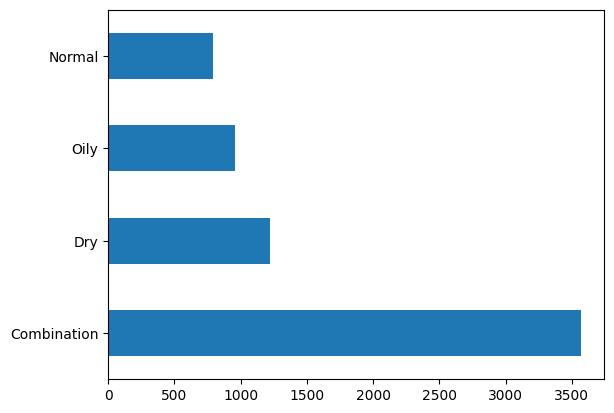

In [24]:
# for plotting of various characteristic, will drop the no data columns
skin_type = user_user_df_cleaned[user_user_df_cleaned['Skin_Type'] != 'No data']
skin_type['Skin_Type'].value_counts().plot(kind = 'barh')

Text(0.5, 1.0, 'Hair_Color')

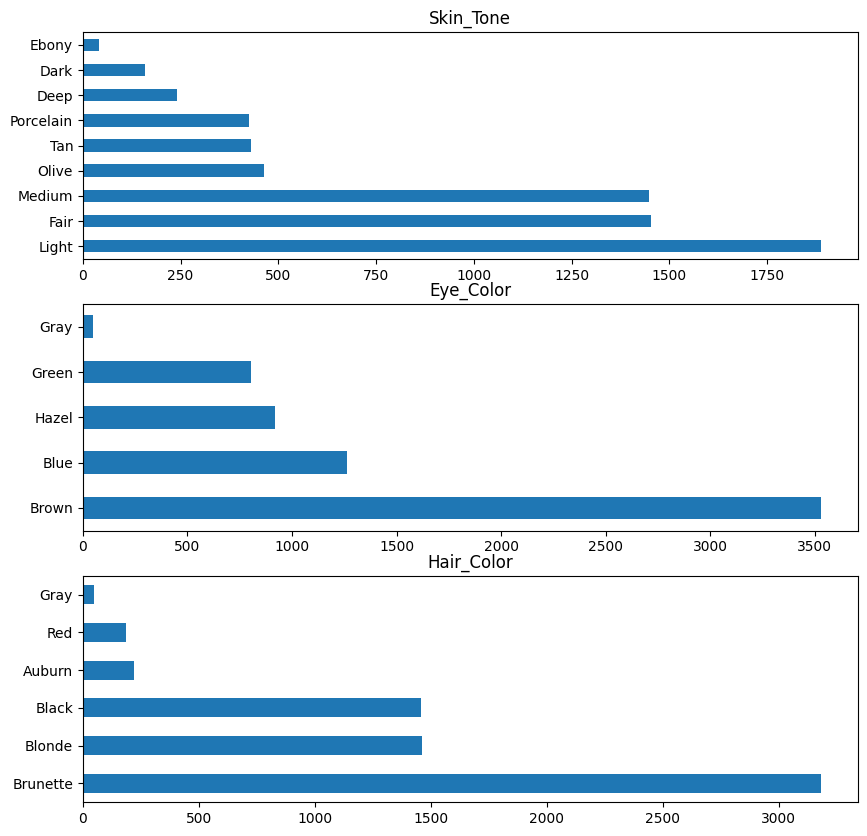

In [25]:
#visualization of all user personal features
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
skin_tone = user_user_df_cleaned[user_user_df_cleaned['Skin_Tone'] != 'No data']
skin_tone['Skin_Tone'].value_counts().plot(kind = 'barh', ax = ax1)
ax1.set_title("Skin_Tone")
eye_color = user_user_df_cleaned[user_user_df_cleaned['Eye_Color'] != 'No data']
eye_color['Eye_Color'].value_counts().plot(kind = 'barh', ax = ax2)
ax2.set_title("Eye_Color")
Hair_color = user_user_df_cleaned[user_user_df_cleaned['Hair_Color'] != 'No data']
Hair_color['Hair_Color'].value_counts().plot(kind = 'barh', ax = ax3)
ax3.set_title("Hair_Color")

##### Product reviews per person

In [27]:
number_reviews_per_user = user_user_df_cleaned.groupby('User_id')['Product_id'].count().sort_values(ascending=False)

In [28]:
number_reviews_per_user

User_id
7005     29
975      27
7008     23
7075     21
6983     18
         ..
3646      1
3645      1
3644      1
3643      1
10354     1
Name: Product_id, Length: 9837, dtype: int64

In [29]:
num_reviews_df = pd.DataFrame(np.unique(number_reviews_per_user, return_counts = True)).transpose()
num_reviews_df.rename(columns={0: "Review_count", 1: "User_count"})

,Review_count,User_count
0,1,7886
1,2,1444
2,3,254
3,4,101
4,5,49
5,6,28
6,7,22
7,8,11
8,9,13
9,10,6
